# Feature Scaling 
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Example: If an algorithm is not using feature scaling method then it can consider the value 3000 meter to be greater than 5 km but that’s actually not true and in this case, the algorithm will give wrong predictions. So, we use Feature Scaling to bring all values to same magnitudes and thus, tackle this issue.

### Techniques to perform Feature Scaling

Consider the two most important ones:

For this lets consider a  dataset:
$$ X = \begin{bmatrix}
- & x_1^{T} & -\\
- & x_2^{T} & -  \\
- & . & - \\
- & . & - \\
- & . & - \\
- & x_m^{T} & - \\
\end{bmatrix}$$

Where $x_i \in R^{(n\;,\;1)}$ is by nature a row vector, therefore$X \in R^{(n\;,\;m)}$ Where $m$ is the number of of features and $n$ is the dataset's lenght

Before applying feature Scaling is a good practice to skew our data, a simple approach to achive this goal is to apply the natural long of the data, this way we wish to obtain something similar to  a normal (gaussian) distribution

#### Min-Max Normalization:
This technique re-scales a feature or observation value with distribution value between 0 and 1.

$$ X_{new} = \frac{X_i - min(X)}{max(X) - min(X)} $$

#### Standardization: 
It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.

$$ X_{new} = \frac{X_i - \bar{X}}{X_{std}} $$

Where:
<br>
The **Mean**is defined as:
$$\bar{X} = \frac{\sum_{i=1}^{n} x_i}{n}$$

The **Standard Deviation** is defined as:
$$\bar{X} = \sqrt{\frac{\sum_{i=1}^{n} (x_i-\bar{x})^2}{n}}$$

In [1]:
import numpy as np
import pandas as pd
from skimage import io
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Unskew Data

In [2]:
def unskew_data(data):
    """ Unskew data by applying ln(data)"""
    return np.log(data)
    

###  Standarization 

In [3]:
### MEAN Unvectorized implementation ###
def mean(data):
    """ returns Mean of  Rows of a Matrix """
    N,M = data.shape              # Get n (lenght) and m (features)
    Mean_vector = np.zeros((1,M)) # Create a vector to store mean
    
    for m in range(0,M):                      # Iterate over features
        for n in range(0,N):                  # Iterate over Data
            Mean_vector[0,m] += data[n,m]      # Add up the data
        Mean_vector[0,m] = Mean_vector[0,m]/N  # Divided by length
    
    return Mean_vector


### Standard Deviation Unvectorized implementation ###
def std(data):
    """ returns Standard Deviation of  Rows of a Matrix """
    N,M = data.shape              # Get n (lenght) and m (features)
    Mean_vector = mean(data)      # Get mean vector 
    std_vector  = np.zeros((1,M)) # Create a vector to store mean
    
    for m in range(0,M):                      # Iterate over features
        for n in range(0,N):                  # Iterate over Data
            std_vector[0,m] += (data[n,m] - Mean_vector[0,m])**2     
        std_vector[0,m] = np.sqrt(std_vector[0,m]/N)   
        
    return std_vector


## Standarzation Unvectorized implementation ###
def standarization(data):
    """Returns standarized Matrix"""
    N,M = data.shape                           # Get n (lenght) and m (features)
    Mean_vector = mean(data)                   # Get mean vector
    std_vector  = std(data)                    # Get std vector
    s_data = np.zeros((N,M),dtype=np.float32)  # Get A matrix of zeros with float type 
    for m in range(0,M):           # Iterate over features
        for n in range(0,N):       # Iterate over Data
            s_data[n,m] = (data[n,m]-Mean_vector[0,m])/std_vector[0,m]
    return s_data


### Standarzation Vecotrized Implementation ###
def standarization_v(data):
    """Returns standarized Matrix"""
    mean = data.mean(axis=0)
    std  = data.std(axis=0)
    s_data = (data -  mean )/std
    
    return s_data

### Visual aid to caompare data ###
def Plot_before_after(data,data_s):
    """ Plot Data bedore and after porepocessing"""
    fig, axis = plt.subplots(ncols=2,nrows=1,figsize=(8,6))
    ax = axis.flatten()

    #### data ####
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes('right', size='50%', pad=0.1)
    im = ax[0].matshow(data)
    fig.colorbar(im, cax=cax, orientation='vertical')
    ax[0].set_title("Raw Data")

    ### Standarized ###
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes('right', size='50%', pad=0.1)
    im = ax[1].matshow(data_s)
    fig.colorbar(im, cax=cax, orientation='vertical')
    ax[1].set_title("Preprocessed Data")
    plt.show()
    
def look_at_distribution(data,color="tab:blue"):
    '''Look at the distributions '''

    fig,axis = plt.subplots(1,3,figsize=(15,4)) # Create subplots
    ax = axis.flatten()                         # Flatten axis
    
    ### Iterate over columns ###
    for i,col in enumerate(data.columns):        
        ax[i].hist(data.loc[:, col], color = color) # Plot histogram
        ax[i].set_title(f"Colum {i}")               # Set title 

    plt.show()                                      # plot figure

In [7]:
data_df = pd.read_csv(r'datasets\ex1data2.txt')  # Load Dataset
data_df.tail()                                   # Show first 5 elements

,2104,3,399900
41,2567,4,314000
42,1200,3,299000
43,852,2,179900
44,1852,4,299900
45,1203,3,239500


Dataset shape: (46, 3)
Unstandarized data mean: [1.99843478e+03 3.17391304e+00 3.39119457e+05], std: [7.94553160e+02 7.60558943e-01 1.24725198e+05]
Standarized   data mean: [ 2.5915063e-09  1.8950390e-08 -1.2957531e-08], std: [0.9999999 1.        1.       ]


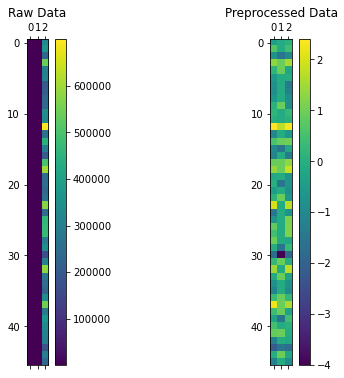

In [272]:
space = " "                                             # Space variable for formatting 
data = data_df.values;                                  # Converting to a numpy array in order to work with data 
data_un = unskew_data(data)                             # Unskew data
print(f"Dataset shape: {data.shape}")                   # Lets chake dimensions
data_s = standarization(data_un)                        # Standarized data
df = pd.DataFrame(data=data_s,columns=["x1", "x2","y"]) # Create padnas Data frame of standarized data 
df.head()                                               # Show head of standarized data 

############################ Tell the user some usefull information ##########################
print(f"Unstandarized data mean: {data.mean(axis=0)}, std: {data.std(axis=0)}")
print(f"Standarized {space} data mean: {data_s.mean(axis=0)}, std: {data_s.std(axis=0)}")

Plot_before_after(data,data_s)                          # plot bedore and after


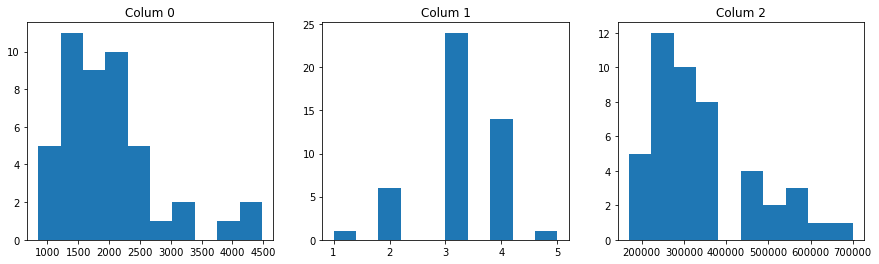

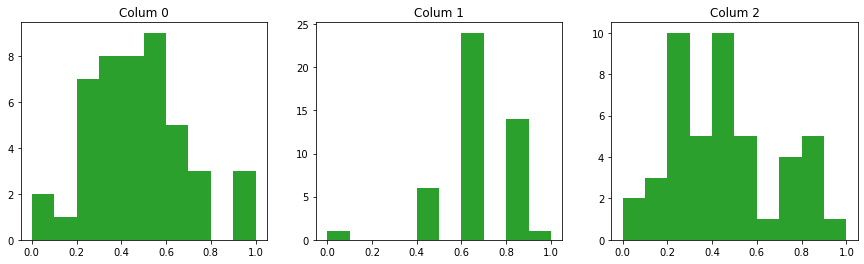

In [277]:
### PLot distributions ###
look_at_distribution(data_df,color="tab:blue")
look_at_distribution(df,color="tab:green")

**Notes:**
<br>
* We have a dataset of 46 examples, each example with 3 features, notice that every feature is in a different scale.
* In order to have a smooth Gradient descent we need  to scale the data.
* After standarization the mean is close to 0 and the std close to 1.
* Notices that the raw data is largerly imbalanced,if we traiend a machine learning algorithm with this dataset it would only take into account the 3rd feature.
* After Standarization now all the features are balanced and will have a similar impact in the model.

### Min-Max Normalization

In [274]:
## Min  Unvectorized implementation ###
def mins(data):
    """ Returns min of Mitrix's rows"""
    N,M = data.shape              # Get n (lenght) and m (features)
    Min_vector = np.zeros((1,M))  # Create a vector to store Min
    
    for m in range(0,M):              # Iterate over features
        min_value = + np.inf          # Set min value to a Really high number
        for n in range(0,N):          # Iterate over Data
            if data[n,m] < min_value:  # If current value is less than min_value       
                min_value = data[n,m]  # Save new min-value 

        Min_vector[0,m] =  min_value    # Once we iterate over m store value
    
    return  Min_vector

## Max  Unvectorized implementation ###
def maxs(data):
    """ Returns min of Mitrix's rows"""
    N,M = data.shape              # Get n (lenght) and m (features)
    Max_vector = np.zeros((1,M))  # Create a vector to store Min
    
    for m in range(0,M):              # Iterate over features
        max_value = - np.inf          # Set max value to a Really small number
        for n in range(0,N):          # Iterate over Data
            if data[n,m] > max_value:  # If current value is less than min_value       
                max_value = data[n,m]  # Save new max-value 

        Max_vector[0,m] =  max_value    # Once we iterate over m store value
    
    return  Max_vector

## Min-Max Unvectorized implementation ###
def min_max_normalziation(data):
    """Returns standarized Matrix"""
    N,M = data.shape                          # Get n (lenght) and m (features)
    Min_vector =  mins(data)                  # Get min vector
    Max_vector  = maxs(data)                   # Get max vector
    s_data = np.zeros((N,M),dtype=np.float32)  # Get A matrix of zeros with float type 
    for m in range(0,M):           # Iterate over features
        for n in range(0,N):       # Iterate over Data
            s_data[n,m] = (data[n,m]-Min_vector[0,m])/(Max_vector[0,m] - Min_vector[0,m])
    return s_data

## Min-Max vectorized implementation ###
def min_max_normalziationV(data):
    """Returns standarized Matrix"""
    Min =  np.min(data,axis=0)      # Get min vector
    Max =  np.max(data,axis=0)      # Get max vector
    s_data = (data-Min)/(Max- Min)

    return s_data

Dataset shape: (46, 3)
Unormalized data mean: [1.99843478e+03 3.17391304e+00 3.39119457e+05], std: [7.94553160e+02 7.60558943e-01 1.24725198e+05]
Normalized   data mean: [0.47192657 0.69620764 0.44546217], std: [0.22036217 0.17359985 0.24040419]


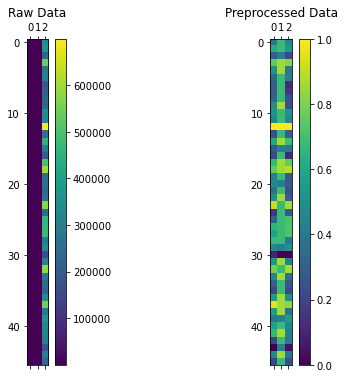

In [275]:
space = " "                                             # Space variable for formatting 
data = data_df.values;                                  # Converting to a numpy array in order to work with data 
data_un = unskew_data(data)                             # Unskew data
print(f"Dataset shape: {data.shape}")                   # Lets chake dimensions
data_s = min_max_normalziationV(data_un)                # Normalized data data
df = pd.DataFrame(data=data_s,columns=["x1", "x2","y"]) # Create padnas Data frame of standarized data 
df.head()                                               # Show head of standarized data 

############################ Tell the user some usefull information ##########################
print(f"Unormalized data mean: {data.mean(axis=0)}, std: {data.std(axis=0)}")
print(f"Normalized {space} data mean: {data_s.mean(axis=0)}, std: {data_s.std(axis=0)}")

Plot_before_after(data,data_s)                          # plot bedore and after


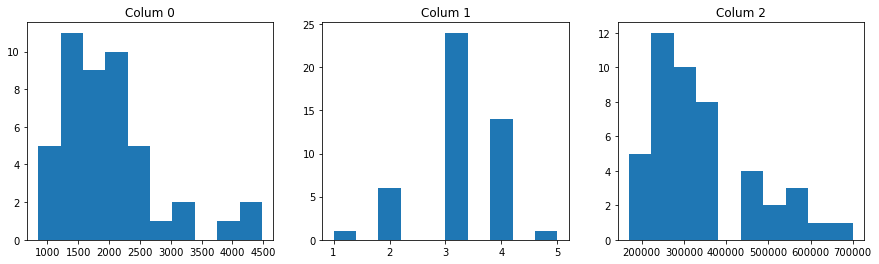

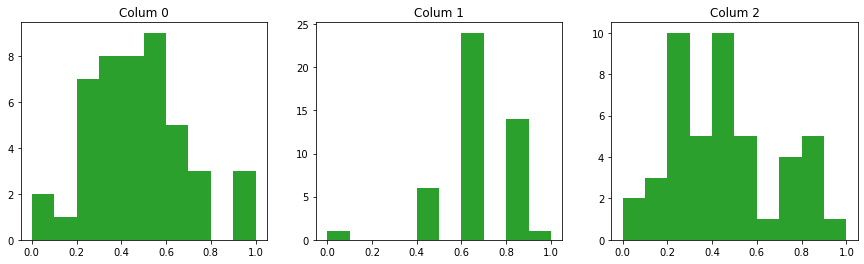

In [276]:
### PLot distributions ###
look_at_distribution(data_df,color="tab:blue")
look_at_distribution(df,color="tab:green")

**Notes:**
<br>
* Notice that if our goal is to achive a mean of 0 and a standard divation of 1, Standarization out perfroms Normalization.

####  Standarization with Sklearn
We can also use third party libraries in order to apply standarization "Fasta", though it is always a good idea to apply everything from scratch.

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_sc=sc.fit_transform(data);
df = pd.DataFrame(data=data_sc,columns=["x1", "x2","y"])
df.head()

,x1,x2,y
0,-0.501458,-0.228665,-0.073918
1,0.505398,-0.228665,0.239571
2,-0.733034,-1.543487,-0.858844
3,1.260539,1.086158,1.609783
4,-0.016909,1.086158,-0.314447
